In [389]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

In [390]:
#Datetime - parse_dates=True, index_col="Date", infer_datetime_format=True

whale_returns = pd.read_csv('whale_returns.csv', index_col ='Date', parse_dates=True, infer_datetime_format=True)
algo_returns = pd.read_csv('algo_returns.csv', index_col ='Date', parse_dates=True, infer_datetime_format=True)
sp500_history = pd.read_csv('sp500_history.csv', index_col ='Date', parse_dates=True, infer_datetime_format=True)

In [391]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [392]:
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [393]:
whale_returns = whale_returns.dropna()

In [394]:
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [395]:
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [396]:
algo_returns.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [397]:
algo_returns = algo_returns.dropna()

In [398]:
algo_returns.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [399]:
sp500_history

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [400]:
sp500_history.isna().sum()

Close    0
dtype: int64

In [401]:
sp500_history.dtypes

Close    object
dtype: object

In [402]:
sp500_history['Close'] = sp500_history['Close'].str.replace("$",' ')

<ipython-input-402-9eeba6cfada8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace("$",' ')


In [403]:
sp500_history['Close']

Date
2019-04-23     2933.68
2019-04-22     2907.97
2019-04-18     2905.03
2019-04-17     2900.45
2019-04-16     2907.06
                ...   
2012-10-05     1460.93
2012-10-04     1461.40
2012-10-03     1450.99
2012-10-02     1445.75
2012-10-01     1444.49
Name: Close, Length: 1649, dtype: object

In [404]:
sp500_history = sp500_history.astype(float)

In [405]:
sp500_history.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [406]:
sp500_history.dtypes

Close    float64
dtype: object

In [407]:
sp500_history.columns = ['sp500_close']
sp500_history

,sp500_close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [408]:
sp500_history['sp_500_returns'] = sp500_history['sp500_close'].pct_change()

In [409]:
sp500_history = sp500_history.drop('sp500_close', axis=1)

In [410]:
sp500_history = sp500_history.dropna()

In [411]:
whale_combined = pd.concat([whale_returns, sp500_history, algo_returns], axis=1, join='inner')

In [412]:
#whale_combined = whale_combined.drop('sp500_close', axis=1)

In [413]:
whale_combined.columns = ['soros', 'paulson', 'tiger', 'berkshire', 'sp500', 'Algo_1', 'Algo_2']

In [414]:
whale_combined

,soros,paulson,tiger,berkshire,sp500,Algo_1,Algo_2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.017254,-0.005447,0.001303
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.000509,-0.004331,-0.004572
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.002279,-0.006945,0.002899
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.001577,-0.010301,-0.005228


<AxesSubplot:xlabel='Date'>

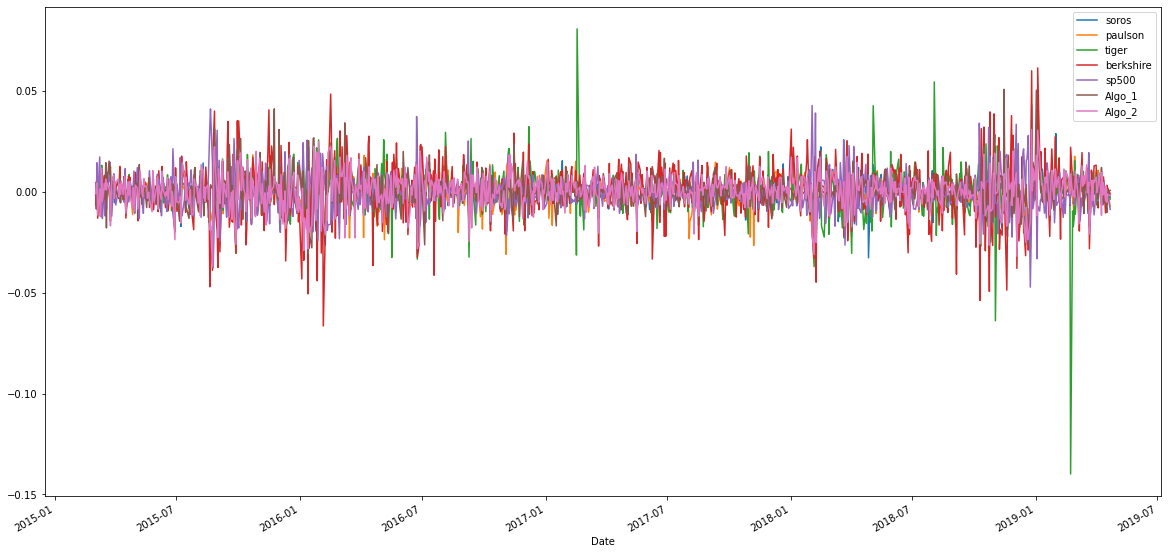

In [415]:
whale_combined.plot(figsize=(20,10))

In [416]:
#whale_combined['soros'].plot()

In [417]:
#whale_combined['paulson'].plot()

In [418]:
#whale_combined['tiger'].plot()

In [419]:
#whale_combined['berkshire'].plot()

In [420]:
#whale_combined['sp500'].plot()

In [421]:
#whale_combined['Algo_1'].plot()

In [422]:
#whale_combined['Algo_2'].plot()

In [423]:
whale_cumulative_returns = (1+whale_combined.copy()).cumprod() -1

In [424]:
whale_cumulative_returns

,soros,paulson,tiger,berkshire,sp500,Algo_1,Algo_2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,0.003208,-0.010514,0.001464
2015-03-05,0.004981,0.002314,-0.000681,0.004327,0.017632,-0.011459,0.005794
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,0.013634,-0.016359,-0.005733
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,0.031123,-0.021717,-0.004437
...,...,...,...,...,...,...,...
2019-04-15,0.157839,-0.213494,-0.137203,0.525584,-0.274944,0.958591,0.264103
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,-0.273292,0.944990,0.267768
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,-0.274438,0.924954,0.261140


<AxesSubplot:xlabel='Date'>

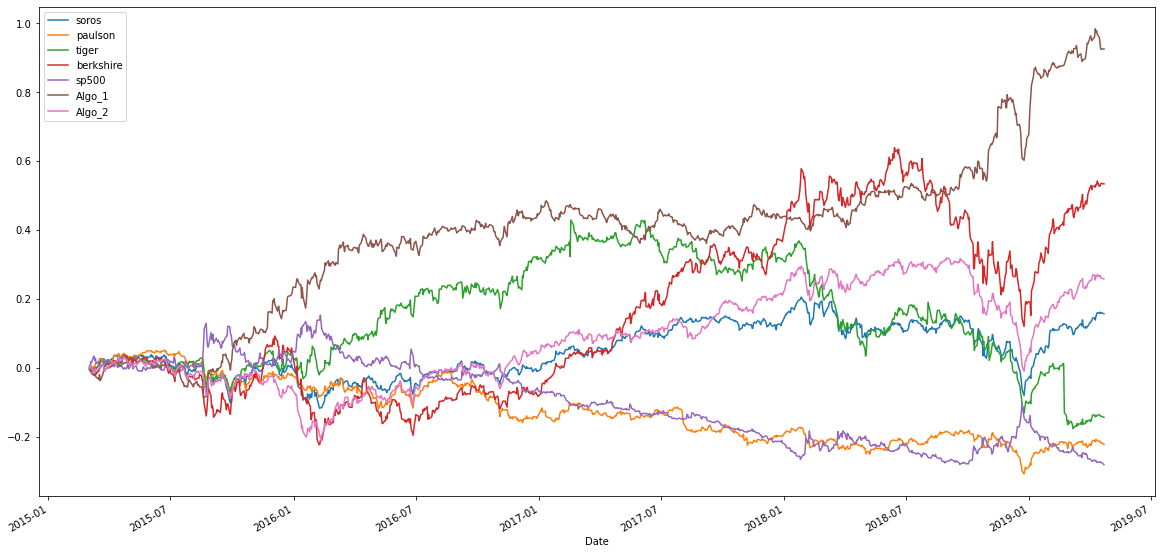

In [425]:
whale_cumulative_returns.plot(figsize=(20,10))

### All portfolios outperformed the S&P 500 index over time as seen in the cumulative returns representative of individual portfolio performance.